#### The code below cleans a set of laptop sales data

In [105]:
import pandas as pd
laptops = pd.read_csv('laptops.csv', encoding='Latin-1')
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
Manufacturer                1303 non-null object
Model Name                  1303 non-null object
Category                    1303 non-null object
Screen Size                 1303 non-null object
Screen                      1303 non-null object
CPU                         1303 non-null object
RAM                         1303 non-null object
 Storage                    1303 non-null object
GPU                         1303 non-null object
Operating System            1303 non-null object
Operating System Version    1133 non-null object
Weight                      1303 non-null object
Price (Euros)               1303 non-null object
dtypes: object(13)
memory usage: 132.4+ KB


In [106]:
laptops.columns

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', ' Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price (Euros)'],
      dtype='object')

In [107]:
new_columns = []
for c in laptops.columns:
    clean_c = c.strip()
    new_columns.append(clean_c)
    
laptops.columns = new_columns
laptops.columns

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', 'Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price (Euros)'],
      dtype='object')

In [108]:
# clean the column labels
def clean_col(col):
    col = col.strip()
    col = col.replace('Operating System','os')
    col = col.replace(' ','_')
    col = col.replace('(','')
    col = col.replace(')',"")
    col = col.lower()
    return col
laptops.columns = [clean_col(col) for col in laptops.columns]
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
manufacturer    1303 non-null object
model_name      1303 non-null object
category        1303 non-null object
screen_size     1303 non-null object
screen          1303 non-null object
cpu             1303 non-null object
ram             1303 non-null object
storage         1303 non-null object
gpu             1303 non-null object
os              1303 non-null object
os_version      1133 non-null object
weight          1303 non-null object
price_euros     1303 non-null object
dtypes: object(13)
memory usage: 132.4+ KB


In [109]:
laptops['screen_size'].unique()

array(['13.3"', '15.6"', '15.4"', '14.0"', '12.0"', '11.6"', '17.3"',
       '10.1"', '13.5"', '12.5"', '13.0"', '18.4"', '13.9"', '12.3"',
       '17.0"', '15.0"', '14.1"', '11.3"'], dtype=object)

In [110]:
laptops['screen_size'] = laptops['screen_size'].str.replace('"','').astype(float)
laptops.rename({'screen_size': 'screen_size_inches'}, axis=1, inplace=True)

In [111]:
laptops['ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [112]:
laptops['ram'] = laptops['ram'].str.replace('GB','').astype(int)
laptops.rename({'ram': 'ram_gb'}, axis=1, inplace=True)

In [113]:
laptops['weight'].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

In [114]:
laptops['weight'] = laptops['weight'].str.replace('kg', '')
laptops['weight'] = laptops['weight'].str.replace('s', '').astype(float)
laptops.rename({'weight':'weight_kg'}, axis=1, inplace=True)
laptops['price_euros'] = laptops['price_euros'].str.replace(',', '.').astype(float)
weight_describe = laptops['weight_kg'].describe()
price_describe = laptops['price_euros'].describe()
print(weight_describe)
print(price_describe)

count    1303.000000
mean        2.038734
std         0.665475
min         0.690000
25%         1.500000
50%         2.040000
75%         2.300000
max         4.700000
Name: weight_kg, dtype: float64
count    1303.000000
mean     1123.686992
std       699.009043
min       174.000000
25%       599.000000
50%       977.000000
75%      1487.880000
max      6099.000000
Name: price_euros, dtype: float64


In [115]:
dtypes = laptops.dtypes
print(dtypes)

manufacturer           object
model_name             object
category               object
screen_size_inches    float64
screen                 object
cpu                    object
ram_gb                  int32
storage                object
gpu                    object
os                     object
os_version             object
weight_kg             float64
price_euros           float64
dtype: object


In [116]:
laptops['gpu'].value_counts().head()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
Name: gpu, dtype: int64

In [117]:
# Extract manufacturer data
laptops['gpu_manufacturer'] = laptops['gpu'].str.split(n=1,expand=True).iloc[:,0] # Limit number of splits in output. n=None, 0 and -1 will be interpreted as return all splits.
laptops['cpu_manufacturer'] = laptops['cpu'].str.split(n=1,expand=True).iloc[:,0]                               
print(laptops['gpu_manufacturer'].head())

0    Intel
1    Intel
2    Intel
3      AMD
4    Intel
Name: gpu_manufacturer, dtype: object


In [118]:
laptops['screen'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [119]:
screen_res = laptops['screen'].str.rsplit(n=1, expand=True)
screen_res.columns = ['A', 'B']
screen_res.loc[screen_res['B'].isnull(), 'B'] = screen_res['A']
laptops['screen_resolution'] = screen_res['B']
print(laptops['screen_resolution'].head())

0    2560x1600
1     1440x900
2    1920x1080
3    2880x1800
4    2560x1600
Name: screen_resolution, dtype: object


In [120]:
laptops['cpu_speed_ghz'] = laptops['cpu'].str.replace('GHz', '')
ca_speed=laptops['cpu_speed_ghz'].str.rsplit(n=1, expand=True)
laptops['cpu_speed_ghz'] = ca_speed.iloc[:,1].astype(float)

In [121]:
mapping_dict = {
    'Android': 'Android',
    'Chrome OS': 'Chrome OS',
    'Linux': 'Linux',
    'Mac OS': 'macOS',
    'No OS': 'No OS',
    'Windows': 'Windows',
    'macOS': 'macOS'
}
laptops['os'] = laptops['os'].map(mapping_dict)

In [122]:
laptops_no_null_rows = laptops.dropna()
laptops_no_null_cols = laptops.dropna(axis=1)

In [123]:
value_counts_before = laptops.loc[laptops['os_version'].isnull(), 'os'].value_counts()
laptops.loc[laptops['os'] == 'macOS', 'os_version'] = 'X'
laptops.loc[laptops['os'] == 'No OS', 'os_version'] = 'Version Unknown'
value_counts_after = laptops.loc[laptops["os_version"].isnull(), "os"].value_counts()
print(value_counts_after)

Linux        62
Chrome OS    27
Android       2
Name: os, dtype: int64


In [124]:
laptops['storage'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '1GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid',
       '512GB SSD +  1TB Hybrid', '256GB SSD +  1TB Hybrid'], dtype=object)

In [125]:
laptops['storage'] = laptops['storage'].str.replace('Flash Storage', 'Flash_Storage')
sp = laptops['storage'].str.split(expand=True)
laptops['storage_1_capacity_gb'] = sp[0].str.replace('GB', '')
laptops['storage_1_capacity_gb'] = laptops['storage_1_capacity_gb'].str.replace('TB', '000').astype(float)
laptops['storage_1_type'] = sp[1]
laptops['storage_1_type'] = laptops['storage_1_type'].str.replace('Flash_Storage', 'Flash Storage')

laptops['storage_2_capacity_gb'] = sp[3].str.replace('GB', '')
laptops['storage_2_capacity_gb'] = laptops['storage_2_capacity_gb'].str.replace('TB', '000').astype(float)
laptops['storage_2_type'] = sp[4]
laptops['storage_2_type'] = laptops['storage_2_type'].str.replace('Flash_Storage', 'Flash Storage')
laptops = laptops.drop('storage', axis=1)

In [131]:
print(laptops['storage_1_capacity_gb'].unique())
print(laptops['storage_1_type'].unique())
print(laptops['storage_2_capacity_gb'].unique())
print(laptops['storage_2_type'].unique())

[1.28e+02 2.56e+02 5.12e+02 5.00e+02 1.00e+03 3.20e+01 6.40e+01 2.00e+03
 1.60e+01 1.00e+00 2.40e+02 8.00e+00 5.08e+02]
['SSD' 'Flash Storage' 'HDD' 'Hybrid']
[  nan 1000.  256. 2000.  500.  512.]
[None 'HDD' 'SSD' 'Hybrid']


In [ ]:
cols = ['manufacturer', 'model_name', 'category', 'screen_size_inches',
        'screen', 'cpu', 'cpu_manufacturer', 'screen_resolution', 'cpu_speed_ghz', 'ram_gb',
        'storage_1_type', 'storage_1_capacity_gb', 'storage_2_type',
        'storage_2_capacity_gb', 'gpu', 'gpu_manufacturer', 'os',
        'os_version', 'weight_kg', 'price_euros']
laptops = laptops.loc[:, cols]
laptops.to_csv('laptops_cleaned.csv', index=False)
laptops_cleaned = pd.read_csv('laptops_cleaned.csv')
laptops_cleaned_dtypes=laptops_cleaned.dtypes

#### Working with Missing Data

In [76]:
import pandas as pd
mvc = pd.read_csv("nypd_mvc_2018.csv")
null_counts = mvc.isnull().sum()
null_counts

unique_key                 0
date                       0
time                       0
borough                20646
location                3885
on_street              13961
cross_street           29249
off_street             44093
pedestrians_injured        0
cyclist_injured            0
motorist_injured           0
total_injured              1
pedestrians_killed         0
cyclist_killed             0
motorist_killed            0
total_killed               5
vehicle_1                355
vehicle_2              12262
vehicle_3              54352
vehicle_4              57158
vehicle_5              57681
cause_vehicle_1          175
cause_vehicle_2         8692
cause_vehicle_3        54134
cause_vehicle_4        57111
cause_vehicle_5        57671
dtype: int64

In [77]:
null_counts_pct = null_counts / mvc.shape[0] * 100
null_df = pd.DataFrame({'null_counts': null_counts, 'null_pct': null_counts_pct})

# Rotate the dataframe
null_df = null_df.T.astype(int)
killed_cols = [col for col in mvc.columns if 'killed' in col]
null_df[killed_cols]

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
null_counts,0,0,0,5
null_pct,0,0,0,0


In [78]:
# .mask(self, cond, other=nan, inplace=False, axis=None, level=None, errors='raise', try_cast=False)[source]
#      Replace values where the condition is True.

killed_cols = [col for col in mvc.columns if 'killed' in col]
killed = mvc[killed_cols].copy()
killed_manual_sum = killed.iloc[:,:3].sum(axis = 1)

killed_mask = (killed_manual_sum != killed["total_killed"])
killed_non_eq = killed[killed_mask]
killed_non_eq

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
3508,0,0,0,NaN
20163,0,0,0,NaN
22046,0,0,1,0.0
48719,0,0,0,NaN
55148,0,0,0,NaN
55699,0,0,0,NaN


In [79]:
print(killed_manual_sum.iloc[3508])
print(killed_manual_sum.iloc[22046])

0
1


Filling null values with the sum of the columns should be a reasonable method for imputation, since only six rows out of 58,000 where total killed != sum of all killed categories.

In [80]:
import numpy as np

# fix the killed values
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'].isnull(), killed_manual_sum)
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'] != killed_manual_sum, np.nan)
killed['total_killed'].value_counts(dropna=True)

0.0    57814
1.0       49
Name: total_killed, dtype: int64

In [81]:
# Create an injured dataframe and manually sum values
injured = mvc[[col for col in mvc.columns if 'injured' in col]].copy()
injured_manual_sum = injured.iloc[:,:3].sum(axis=1)
injured['total_injured'] = injured['total_injured'].mask(injured['total_injured'].isnull(), injured_manual_sum)
injured['total_injured'] = injured['total_injured'].mask(injured['total_injured'] !=injured_manual_sum, np.nan)
injured['total_injured'].value_counts()

0.0     46615
1.0      8590
2.0      1737
3.0       550
4.0       223
5.0        77
6.0        27
7.0        16
9.0         2
15.0        1
10.0        1
13.0        1
14.0        1
22.0        1
8.0         1
Name: total_injured, dtype: int64

In [82]:
summary = {
    'injured': [
        mvc['total_injured'].isnull().sum(),
        injured['total_injured'].isnull().sum()
    ],
    'killed': [
        mvc['total_killed'].isnull().sum(),
        killed['total_killed'].isnull().sum()
    ]
}
print(pd.DataFrame(summary, index=['before','after']))

        injured  killed
before        1       5
after        21       1


In [83]:
mvc["total_injured"] = injured["total_injured"]
mvc["total_killed"] = killed["total_killed"]

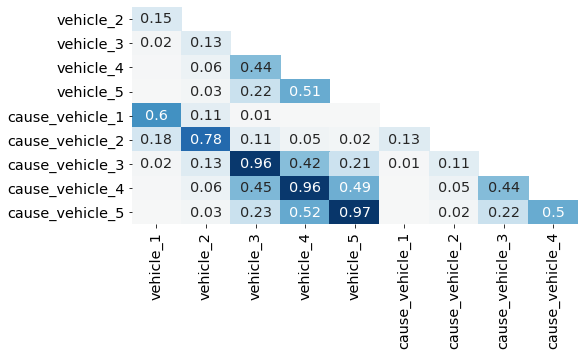

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def plot_null_correlations(df):
    # create a correlation matrix only for columns with at least one missing value
    cols_with_missing_vals = df.columns[df.isnull().sum() > 0]
    missing_corr = df[cols_with_missing_vals].isnull().corr()
    
    # create a triangular mask to avoid repeated values
    missing_corr = missing_corr.iloc[1:, :-1]
    mask = np.triu(np.ones_like(missing_corr), k=1)
    
    # plot a heatmap of the values
    plt.figure(figsize=(8,4))
    ax = sns.heatmap(missing_corr, vmin=-1, vmax=1, cbar=False,
                     cmap='RdBu', mask=mask, annot=True)
    
    # format the text in the plot
    for text in ax.texts:
        t = float(text.get_text())
        if -0.05 < t < 0.01:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks(rotation=90, size='x-large')
    plt.yticks(rotation=0, size='x-large')

    plt.show()
    
col_name = [l for l in mvc.columns if "vehicle" in l]
plot_null_correlations(mvc[col_name])

In [85]:
col_labels = ['v_number', 'vehicle_missing', 'cause_missing']
vc_null_data = []

for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    
    v_null = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
    c_null = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()
    vc_null_data.append([v, v_null, c_null])

vc_null_df = pd.DataFrame(vc_null_data, columns=col_labels)
vc_null_df

,v_number,vehicle_missing,cause_missing
0,1,204,24
1,2,3793,223
2,3,242,24
3,4,50,3
4,5,10,0


In [86]:
# find the most common value in all columns
v_cols = [c for c in mvc.columns if c.startswith("vehicle")]
vehicles = mvc[v_cols]
vehicles = vehicles.stack()
top10_vehicles = vehicles.value_counts().head(10)
top10_vehicles

Sedan                                  33133
Station Wagon/Sport Utility Vehicle    26124
PASSENGER VEHICLE                      16026
SPORT UTILITY / STATION WAGON          12356
Taxi                                    3482
Pick-up Truck                           2373
TAXI                                    1892
Box Truck                               1659
Bike                                    1190
Bus                                     1162
dtype: int64

In [87]:
def summarize_missing():
    v_missing_data = []

    for v in range(1,6):
        v_col = 'vehicle_{}'.format(v)
        c_col = 'cause_vehicle_{}'.format(v)

        v_missing = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
        c_missing = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()

        v_missing_data.append([v, v_missing, c_missing])

    col_labels = columns=["vehicle_number", "vehicle_missing", "cause_missing"]
    return pd.DataFrame(v_missing_data, columns=col_labels)

summary_before = summarize_missing()

for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    v_mask = mvc[v_col].isnull() & mvc[c_col].notnull()
    c_mask = mvc[c_col].isnull() & mvc[v_col].notnull()
    mvc[v_col] = mvc[v_col].mask(v_mask, "Unspecified")
    mvc[c_col] = mvc[c_col].mask(c_mask, "Unspecified")

summary_after = summarize_missing()
print(summary_before, '\n')
print(summary_after)


   vehicle_number  vehicle_missing  cause_missing
0               1              204             24
1               2             3793            223
2               3              242             24
3               4               50              3
4               5               10              0 

   vehicle_number  vehicle_missing  cause_missing
0               1                0              0
1               2                0              0
2               3                0              0
3               4                0              0
4               5                0              0


In [88]:
loc_cols = ['borough', 'location', 'on_street', 'off_street', 'cross_street']
location_data = mvc[loc_cols]
location_data.head()

,borough,location,on_street,off_street,cross_street
0,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,NaN,10 AVENUE
1,BROOKLYN,"(40.623714, -73.99314)",16 AVENUE,NaN,62 STREET
2,NaN,"(40.591755, -73.9083)",BELT PARKWAY,NaN,NaN
3,QUEENS,"(40.73602, -73.87954)",GRAND AVENUE,NaN,VANLOON STREET
4,BRONX,"(40.884727, -73.89945)",NaN,208 WEST 238 STREET,NaN


In [89]:
print(location_data.isnull().sum())

borough         20646
location         3885
on_street       13961
off_street      44093
cross_street    29249
dtype: int64


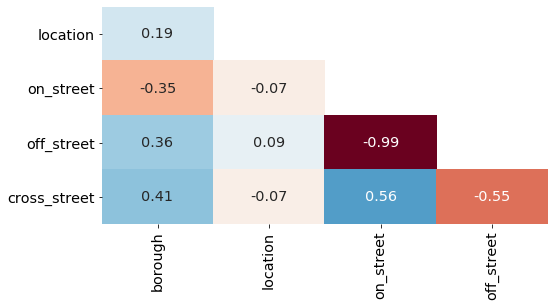

In [90]:
plot_null_correlations(location_data)

In [91]:
sup_data = pd.read_csv('supplemental_data.csv')
sup_data.head()

,unique_key,location,on_street,off_street,borough
0,3869058,NaN,NaN,NaN,NaN
1,3847947,NaN,NaN,NaN,NaN
2,3914294,NaN,BELT PARKWAY,NaN,BROOKLYN
3,3915069,NaN,NaN,NaN,NaN
4,3923123,NaN,NaN,NaN,NaN


In [92]:
location_cols = ['location', 'on_street', 'off_street', 'borough']
null_before = mvc[location_cols].isnull().sum()
for col in location_cols:
    v_mask = mvc[col].isnull()
    mvc[col] = mvc[col].mask(v_mask, sup_data[col])

null_after = mvc[location_cols].isnull().sum()

print(null_before, '\n')
print(null_after)

location       3885
on_street     13961
off_street    44093
borough       20646
dtype: int64 

location         77
on_street     13734
off_street    36131
borough         232
dtype: int64


### Exploring Ebay Car Sales Data

In [ ]:
""" This project will clean a subdataset of used cars from a 
classifieds section of the German eBay website eBay 
Kleinanzeigen """

In [1]:
import pandas as pd
import numpy as np
autos=pd.read_csv('autos.csv', encoding="Latin-1")

In [ ]:
autos.info()

In [ ]:
autos.head()

In [ ]:
# this dataset has 20 cols and 50,000 observations with 
#'yearOfRegistration', 'powerPS', 'monthOfRegistration', 'nrOfPictures'
# and 'postalCode ' in float64 format, rests are objecgts
# five columns has missing data

In [ ]:
# Cleaning Column Names: converting column names from snakecase, 
# rewording some of the column names to be more descriptive

In [16]:
autos.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer_km', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_Pictures', 'postal_code',
       'last_seen'],
      dtype='object')

In [3]:
autos.columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_Pictures', 'postal_code',
       'last_seen']
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_Pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [ ]:
# changed col names to snakecase to follow good python naming practice.

In [ ]:
autos.describe(include='all')

In [ ]:
# Any columns that have mostly one value that are candidates to be dropped
# Any columns that need more investigation.
# Any examples of numeric data stored as text that needs to be cleaned.

In [ ]:
autos['price'].head()

In [4]:
autos['price']=autos['price'].str.replace(",", "").str.strip()
autos['price']=autos['price'].str.replace("$", "").astype(float)
autos['odometer']=autos['odometer'].str.replace(",", "").str.strip()
autos['odometer']=autos['odometer'].str.replace("km", "").astype(float)

In [ ]:
autos['price'].head()
autos['odometer'].head()

In [5]:
autos.rename({'odometer':'odometer_km'}, axis=1, inplace=True)

In [ ]:
# explore price and odometer_km columns
print(autos['price'].unique().shape)
print(autos['odometer_km'].unique().shape)

In [ ]:
print(autos['price'].describe())
print(autos['odometer_km'].describe())

In [17]:
#remove rows where price=0
autos=autos[autos['price']!=0]

In [15]:
# extract date from columns: 'date_crawled','ad_created','last_seen'
# missing values are included in the distribution
autos['date_crawled'].str[:10].value_counts(normalize=True, dropna=False).sort_index()
autos['ad_created'].str[:10].value_counts(normalize=True, dropna=False).sort_index()
autos['last_seen'].str[:10].head().value_counts(normalize=True, dropna=False).sort_index()

2016-03-15    0.2
2016-04-01    0.2
2016-04-06    0.6
Name: last_seen, dtype: float64

In [ ]:
# explore the distribution of registration_year.
autos['registration_year'].describe()

In [ ]:
# min year is 1000, max year is 9999, both unreal.  

In [14]:
# count the number of listings with cars that fall outside the 1900 - 2016
# to see if it is safe to drop them
test_outside=~autos["registration_year"].between(1900,2016)
test_outside.value_counts(normalize=True, dropna=False).sort_index()

False    1.0
Name: registration_year, dtype: float64

In [13]:
test_between=autos["registration_year"].between(1900,2016)
test_between.value_counts(normalize=True, dropna=False).sort_index()

True    1.0
Name: registration_year, dtype: float64

In [18]:
# less than 3% cars found outside 1900 - 2016 period, 
# check data betwee 1990 and 2016
sele_condition=autos['registration_year'].between(1900,2016)
autos=autos[sele_condition]

In [19]:
autos['registration_year'].value_counts(normalize=True).sort_index().head()

1910    0.000107
1927    0.000021
1929    0.000021
1931    0.000021
1934    0.000043
Name: registration_year, dtype: float64

In [20]:
# cars before 1988 are less than 2%, remove them next
autos=autos[autos['registration_year'] >= 1988]

In [ ]:
autos['brand'].describe()

In [21]:
# selecting top 10 vehicles
selection=autos['brand'].value_counts().head(10)
print(type(selection))
print(selection)

<class 'pandas.core.series.Series'>
volkswagen       9656
bmw              5081
opel             4946
mercedes_benz    4319
audi             4016
ford             3192
renault          2191
peugeot          1392
fiat             1165
seat              852
Name: brand, dtype: int64


In [22]:
# obtain mean prices for top 10 selling vehicles
brand_mean_prices={}
for i in range(len(selection)):
    if selection.index[i] not in brand_mean_prices:
        avg=autos.loc[autos['brand']==selection.index[i], 'price'].mean()
        brand_mean_prices[selection.index[i]]=avg.round(2)
brand_mean_prices

{'audi': 9375.65,
 'bmw': 8575.78,
 'fiat': 2705.09,
 'ford': 3751.19,
 'mercedes_benz': 31657.73,
 'opel': 5448.93,
 'peugeot': 3088.34,
 'renault': 2425.55,
 'seat': 4402.39,
 'volkswagen': 6527.25}

In [ ]:
# It looks like mercedes_benz is the most expensive vehicle, followed by 
# audi, bmw, volkswagen and opel and seat. renault is the cheapest.  
# It's price is 4 times above average!

In [23]:
top_prices=brand_mean_prices

In [24]:
del top_prices['renault']
del top_prices['peugeot']
del top_prices['fiat']
del top_prices['ford']

In [25]:
# converting top_dict to pandas series
bmp_series = pd.Series(top_prices)
print(bmp_series)

audi              9375.65
bmw               8575.78
mercedes_benz    31657.73
opel              5448.93
seat              4402.39
volkswagen        6527.25
dtype: float64


In [26]:
# obtain mean mileage for top 6 selling vehicles
brand_mean_mileages={}
for i in range(len(bmp_series)):
    if bmp_series.index[i] not in brand_mean_mileages:
        avg=autos.loc[autos['brand']==bmp_series.index[i], 'odometer_km'].mean()
        brand_mean_mileages[bmp_series.index[i]]=avg.round(2)
brand_mean_mileages

{'audi': 129094.87,
 'bmw': 132722.89,
 'mercedes_benz': 131044.22,
 'opel': 129834.21,
 'seat': 121267.61,
 'volkswagen': 129121.79}

In [27]:
# converting brand_mean_mileage dictionary to pandas series 
tm_series = pd.Series(brand_mean_mileages)  
df = pd.DataFrame(bmp_series, columns=['mean_prices'])
df['mean_mileages']=tm_series
df

,mean_prices,mean_mileages
audi,9375.65,129094.87
bmw,8575.78,132722.89
mercedes_benz,31657.73,131044.22
opel,5448.93,129834.21
seat,4402.39,121267.61
volkswagen,6527.25,129121.79


In [ ]:
# price is not correlated with mileage, 
# as all other vehicles also have over 100k mileage as Benz 

In [36]:
autos['gearbox'].value_counts()

manual       34094
automatic     9636
Name: gearbox, dtype: int64

In [32]:
# changing values in gearbox from German to English
autos.loc[autos['gearbox']=='manuell', 'gearbox']='manual'
autos.loc[autos['gearbox']=='automatik', 'gearbox']='automatic'
autos['gearbox'].value_counts()

manual       34094
automatic     9636
Name: gearbox, dtype: int64

In [39]:
# changing dates to more readible format
autos['date_crawled']=autos['date_crawled'].str[:10]
autos['ad_created']=autos['ad_created'].str[:10]
autos['last_seen']=autos['last_seen'].str[:10]
mycopy.head(2)

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_Pictures,postal_code,last_seen
0,2016-03-26,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000.0,control,bus,2004,manual,158,andere,150000.0,3,lpg,peugeot,nein,2016-03-26,0,79588,2016-04-06
1,2016-04-04,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500.0,control,limousine,1997,automatic,286,7er,150000.0,6,benzin,bmw,nein,2016-04-04,0,71034,2016-04-06


In [41]:
autos['date_crawled']=autos['date_crawled'].str.replace("-", "").str.strip()
autos['ad_created']=autos['ad_created'].str.replace("-", "").str.strip()
autos['last_seen']=autos['last_seen'].str.replace("-", "").str.strip()
mycopy.head(2)

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_Pictures,postal_code,last_seen
0,20160326,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000.0,control,bus,2004,manual,158,andere,150000.0,3,lpg,peugeot,nein,20160326,0,79588,20160406
1,20160404,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500.0,control,limousine,1997,automatic,286,7er,150000.0,6,benzin,bmw,nein,20160404,0,71034,20160406


### Find the best markets to advertise in

##### The goal of this analysis is to find out the two best markets to advertise an e-learning company's product in using 2017 New Coder Surveysurvey data by FreeCodeCamp. https://github.com/freeCodeCamp/2017-new-coder-survey

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
df = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)
print(df.shape)

(18175, 136)


In [32]:
df.head(2)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## analyze job interests

In [33]:
job_interest_freq = df['JobRoleInterest'].value_counts()
print(job_interest_freq.head(10))

Full-Stack Web Developer                               823
  Front-End Web Developer                              450
  Data Scientist                                       152
Back-End Web Developer                                 142
  Mobile Developer                                     117
Game Developer                                         114
Information Security                                    92
Full-Stack Web Developer,   Front-End Web Developer     64
  Front-End Web Developer, Full-Stack Web Developer     56
  Product Manager                                       55
Name: JobRoleInterest, dtype: int64


Most people are interested in more than one subject.  Will fofus on those who are interested in Web or Mobile development

In [34]:
interest_no_null = df['JobRoleInterest'].dropna()
WM_freq = interest_no_null.str.contains('Web Developer' or 'Mobile Developer')
WM_freq_table = WM_freq.value_counts(normalize = True)*100
WM_freq.sum()/job_interest_freq.sum()*100
web_freq = job_interest_freq.filter(regex='Web Developer').sum()/job_interest_freq.sum()*100
mobile_freq = job_interest_freq.filter(regex='Mobile Developer').sum()/job_interest_freq.sum()*100
print(WM_freq_table)
print('\n', web_freq, '   ', mobile_freq)

True     82.608696
False    17.391304
Name: JobRoleInterest, dtype: float64

 82.6086956521739     32.951945080091534


(0, 90)

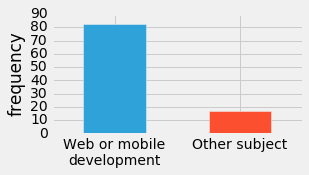

In [35]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(4,2))
WM_freq_table.plot.bar()
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0)
plt.ylabel('frequency')
plt.ylim([0,90])

### analyze coder locations

(0, 2000)

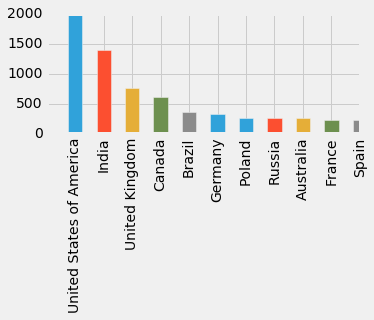

In [36]:
freq = df['CountryLive'].value_counts()
plt.figure(figsize=(5,2))
freq.plot.bar()
plt.xlim(-1,10)
plt.ylim(0, 2000)

US and India are the two most attrictive markets for advertisement

(0, 0.4)

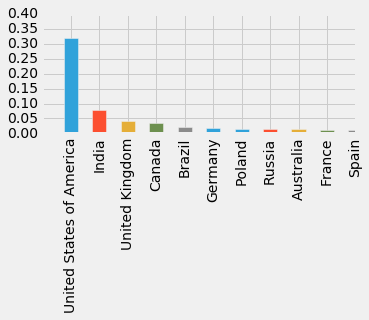

In [37]:
relative_freq = freq / df.shape[0]
plt.figure(figsize=(5,2))
relative_freq.plot.bar()
plt.xlim(-1,10)
plt.ylim(0, 0.4)

In [38]:
relative_freq.head(5)

United States of America    0.318624
India                       0.077029
United Kingdom              0.041651
Canada                      0.033893
Brazil                      0.020028
Name: CountryLive, dtype: float64

### coder's willingness to pay

In [39]:
df['MonthsProgramming'] = df['MonthsProgramming'].apply(lambda x: 1 if x ==0 else x)
df['Dollar_per_month'] = df['MoneyForLearning']/df['MonthsProgramming']
df['Dollar_per_month'].value_counts(dropna=False).sort_values(ascending=False).head(10)

 0.000000      7736
NaN            1995
 16.666667      317
 8.333333       315
 50.000000      292
 25.000000      278
 100.000000     252
 33.333333      239
 4.166667       222
 10.000000      214
Name: Dollar_per_month, dtype: int64

In [40]:
df = df.dropna(subset=['Dollar_per_month'])
df['Dollar_per_month'].value_counts(ascending=False).head(5)

0.000000     7736
16.666667     317
8.333333      315
50.000000     292
25.000000     278
Name: Dollar_per_month, dtype: int64

In [13]:
df['CountryLive'].value_counts(dropna=False).head(5)

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

##### analyze data based on countries of interest

In [19]:
c1=df['CountryLive']=='United States of America'
c2=df['CountryLive']=='India'
c3=df['CountryLive']=='United Kingdom'
c4=df['CountryLive']=='Canada'
df1 = df.loc[c1|c2|c3|c4]
df1['CountryLive'].value_counts()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Name: CountryLive, dtype: int64

In [20]:
df1_group = df1.groupby('CountryLive')
df1_group['Dollar_per_month'].mean()

CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    227.997996
Name: Dollar_per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


([<matplotlib.axis.XTick at 0x7f48f97286d8>,
 <a list of 4 Text xticklabel objects>)

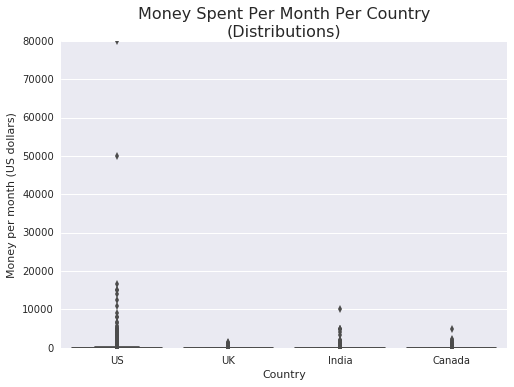

In [25]:
import seaborn as sns
sns.boxplot(y = 'Dollar_per_month', x = 'CountryLive', data = df1)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])

In [39]:
df2 = df1[df1['Dollar_per_month'] < 20000]
print(df1.shape, df2.shape)

(3915, 137) (3913, 137)


In [40]:
df2_group = df2.groupby('CountryLive')
df2_group['Dollar_per_month'].mean()

CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    183.800110
Name: Dollar_per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


([<matplotlib.axis.XTick at 0x7f48f95619e8>,
 <a list of 4 Text xticklabel objects>)

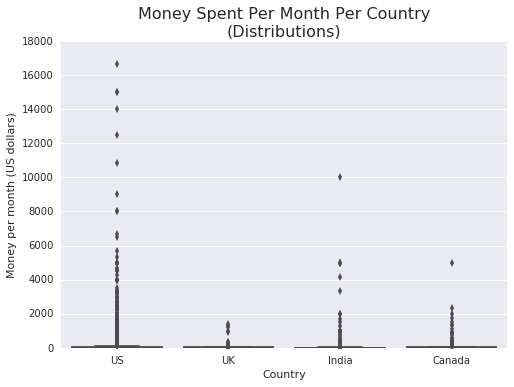

In [41]:
sns.boxplot(y = 'Dollar_per_month', x = 'CountryLive', data = df2)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])

In [55]:
s1 = df2['CountryLive'] == 'United States of America'
s2 = df2['Dollar_per_month'] >= 6000
df2_cleaned = df2.drop(df2[s1&s2].index)
df2_cleaned.shape

(3902, 137)

In [56]:
s1 = df2_cleaned['CountryLive'] == 'India'
s2 = df2_cleaned['Dollar_per_month'] > 2500
df2_cleaned = df2_cleaned.drop(df2_cleaned[s1&s2].index)
df2_cleaned.shape

(3896, 137)

In [57]:
s1 = df2_cleaned['CountryLive'] == 'Canada'
s2 = df2_cleaned['Dollar_per_month'] > 4000
df2_cleaned = df2_cleaned.drop(df2_cleaned[s1&s2].index)
df2_cleaned.shape

(3895, 137)

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


([<matplotlib.axis.XTick at 0x7f49095f3358>,
 <a list of 4 Text xticklabel objects>)

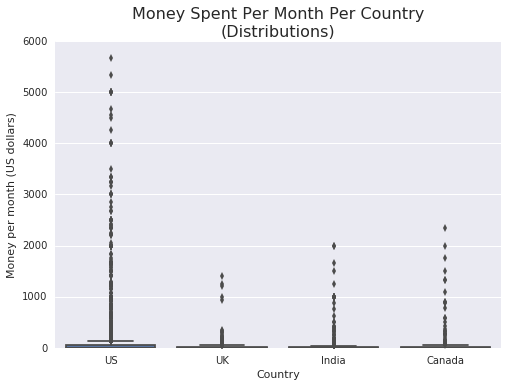

In [59]:
sns.boxplot(y = 'Dollar_per_month', x = 'CountryLive', data = df2_cleaned)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])

In [60]:
df2_cleaned_group = df2_cleaned.groupby('CountryLive')
df2_cleaned_group['Dollar_per_month'].mean()

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: Dollar_per_month, dtype: float64